In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Y = wX + b**

* y -> Dependent Variable

* X -> Independent Variable

* w -> weight (slope)

* b -> bias (y intercept)

___

## Gradient descent
 * w = w - α*dw
 * b = b - α*db
 
 ### α -> Learning Rate (alpha)
 
 #### This Learning Rate is the step size at each iteration while moving towards a min of loss function

___
### dW and db are simply the derivative of the loss function with regards to the weights and biases.

### $$ {Loss\ Function\ (MSE)} =  {{1 \over m} \sum_{i=1}^m{(y_{i}−h(x_{i}))^2}} $$

### $${dW} = {{-2 \over m} \sum_{i=1}^m{(y_{i}−h(x_{i}))x_{i}}}$$

> #### $${dW} = {{-2 \over m} \sum_{i=1}^m{(y_{i}−y_{ipred})x_{i}}}$$

### $${db} = {{-2 \over m} \sum_{i=1}^m{(y_{i}−h(x_{i}))}}$$

> #### $${db} = {{-2 \over m} \sum_{i=1}^m{(y_{i}−y_{ipred})}}$$

In [2]:
class simple_linear_reg():
    
    def __init__(self, alpha, n_iters):
        self.alpha = alpha
        self.n_iters = n_iters
        
    def fit(self, x,y):
        self.m, self.n = x.shape
#         m,n -> rows,cols
        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y
        
        # for optimizing, implementing Gradient descent
        
        for i in range(self.n_iters):
            self.update_wt()

    def update_wt(self):
        y_pred = self.predict(self.x)
        
        # cal gradients (dw & db)
        dw = (-2 * (self.x.T).dot(self.y - y_pred))/self.m
        db = (-2 * np.sum(self.y - y_pred))/self.m
        
        self.w = self.w - self.alpha*dw
        self.b = self.b - self.alpha*db
        
    def predict(self, x):
        return x.dot(self.w) + self.b
        

___
## Flow 
* Initialize the model by setting the alpha, n_iters, wt etc
* Built the LR Equation
* find the y_pred value for given x
* find dw & db from the Loss Function
* Update the w & b values 
* repeat step 3,4,5 until a min loss function is obtained


In [3]:
df = pd.read_csv("/kaggle/input/dataset/salary_data.csv")

In [4]:
df.shape

(30, 2)

In [5]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

## Training the linear Model

In [24]:
slr = simple_linear_reg(0.02, 300)

In [25]:
slr.fit(x_train, y_train)

In [26]:
yp = slr.predict(x_test)

In [27]:
slr.w[0]

9638.885601750153

In [28]:
slr.b

23871.313258143215

### With these Wt & Bias, Our Equation becomes :
* y = 9638.88*(x) + 23871.31

In [29]:
print(yp)

[116404.61503494  71101.85270672 102910.17519249  74957.40694742
  54715.74718374  59535.18998462]


In [30]:
print(y_test)

[112635  67938 113812  83088  64445  57189]


___
## Visualization

In [32]:
import matplotlib.pyplot as plt

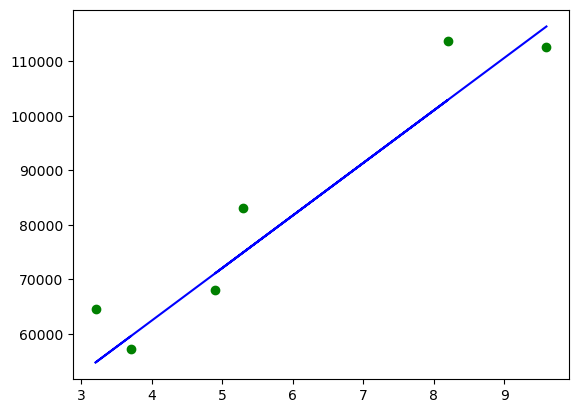

In [33]:
plt.scatter(x_test, y_test, color = "green")
plt.plot(x_test, yp, color = 'blue')

___
### Calculating R2 Metric

In [34]:
SSR = ((y_test - yp)**2).sum()

In [35]:
SST = ((y_test - y_test.mean()) ** 2).sum()

In [36]:
R2 = 1-(SSR/SST)
R2

0.8990662642377971